In [2]:
import pandas as pd

In [6]:
clinical = pd.read_csv('ANMerge_clinical_under_90 1 (1).csv')

In [8]:
gene_expression = pd.read_csv('/Users/albertbay/Desktop/Работа/AlzheimerCausalInference/ANMerge_gene_expression_raw_under_90 (1).csv')

In [9]:
gene_expression

,Key,Visit,Month,Site,Diagnosis,Sex,Age,APOE,MMSE,Gexp_batch,...,ILMN_1737406,ILMN_1737413,ILMN_1737416,ILMN_1737418,ILMN_1737425,ILMN_1737426,ILMN_1737430,ILMN_1737433,ILMN_1737434,ILMN_1737435
0,DCR00001_1,1,0,DCR,AD,Female,80.0,E3E4,21.0,2.0,...,780.100000,82.1000,76.8000,86.6000,74.40000,107.2000,76.8000,76.7000,73.0000,74.00000
1,DCR00004_1,1,0,DCR,MCI,Male,78.0,E4E4,27.0,2.0,...,1812.900000,118.7000,109.6000,116.7000,95.10000,568.2000,91.7000,93.9000,94.8000,87.30000
2,DCR00009_1,1,0,DCR,CTL,Female,69.0,E3E3,30.0,2.0,...,1235.800000,87.7000,94.8000,106.4000,83.20000,132.8000,81.7000,85.5000,81.6000,79.90000
3,DCR00013_1,1,0,DCR,CTL,Male,82.0,E3E3,30.0,2.0,...,1020.000000,89.6000,84.3000,95.0000,82.90000,214.1000,76.8000,81.1000,78.2000,76.60000
4,DCR00014_1,1,0,DCR,CTL,Female,75.0,E2E3,30.0,2.0,...,438.700000,83.6000,80.9000,92.5000,75.70000,137.1000,78.0000,78.1000,78.3000,78.70000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,TLSMCI608_1,1,0,Toulouse,MCI,Male,73.0,E3E3,28.0,1.0,...,2692.393008,117.8118,121.2486,136.1811,111.12510,177.3843,126.5258,123.6391,116.5386,125.65210
701,TLSMCI609_1,1,0,Toulouse,MCI,Female,63.0,E3E3,28.0,2.0,...,618.800000,91.0000,85.3000,92.3000,85.60000,165.8000,83.6000,78.4000,80.0000,79.40000
702,TLSMCI610_1,1,0,Toulouse,MCI,Male,73.0,E3E3,29.0,NaN,...,123.500000,76.4000,73.1000,87.4000,74.70000,73.2000,74.3000,79.7000,75.9000,75.60000
703,TLSMCI611_1,1,0,Toulouse,MCI,Female,78.0,E3E3,30.0,2.0,...,881.200000,95.4000,98.4000,103.5000,91.30000,177.5000,95.8000,87.8000,90.7000,83.50000


In [12]:
gene_expression.groupby(['Diagnosis'])['Key'].count()

Diagnosis
AD     232
CTL    254
MCI    219
Name: Key, dtype: int64

In [13]:
gene_expression.groupby(['Diagnosis'])['Age'].mean()

Diagnosis
AD     72.697248
CTL    66.327189
MCI    73.736041
Name: Age, dtype: float64

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# 1️⃣ Загрузка данных
df = pd.read_csv('/Users/albertbay/Desktop/Работа/AlzheimerCausalInference/ANMerge_gene_expression_raw_under_90 (1).csv')

# 2️⃣ Выбираем группы для сравнения (например, "AD" и "CTL")
group_column = "Diagnosis"  # столбец с группами
group1_name = "AD"   # Группа 1: Альцгеймер
group2_name = "CTL"  # Группа 2: Контроль

# 3️⃣ Разделение данных на метаданные и экспрессионные данные
meta_cols = ["Key", "Visit", "Month", "Site", "Diagnosis", "Sex", "Age", "APOE", "MMSE", "Gexp_batch"]
gene_expression = df.drop(columns=meta_cols)  # оставляем только гены

In [21]:
gene_expression

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_1737406,ILMN_1737413,ILMN_1737416,ILMN_1737418,ILMN_1737425,ILMN_1737426,ILMN_1737430,ILMN_1737433,ILMN_1737434,ILMN_1737435
0,5810.20000,899.400000,74.9000,74.6000,77.4000,77.70000,3761.0000,90.1000,75.0000,80.6000,...,780.100000,82.1000,76.8000,86.6000,74.40000,107.2000,76.8000,76.7000,73.0000,74.00000
1,19150.20000,2317.300000,86.3000,103.9000,87.3000,98.20000,3833.6000,148.5000,86.6000,89.7000,...,1812.900000,118.7000,109.6000,116.7000,95.10000,568.2000,91.7000,93.9000,94.8000,87.30000
2,13009.80000,2199.400000,83.6000,106.7000,81.4000,87.30000,220.8000,136.4000,79.7000,85.4000,...,1235.800000,87.7000,94.8000,106.4000,83.20000,132.8000,81.7000,85.5000,81.6000,79.90000
3,12534.90000,1077.700000,75.8000,93.0000,82.4000,80.70000,1629.1000,119.8000,76.7000,80.2000,...,1020.000000,89.6000,84.3000,95.0000,82.90000,214.1000,76.8000,81.1000,78.2000,76.60000
4,10865.80000,952.100000,74.4000,88.3000,76.8000,85.20000,173.6000,97.6000,83.8000,80.6000,...,438.700000,83.6000,80.9000,92.5000,75.70000,137.1000,78.0000,78.1000,78.3000,78.70000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,16740.36995,3937.948995,113.1422,145.5680,123.3907,127.37190,592.2286,172.5845,127.8536,127.0137,...,2692.393008,117.8118,121.2486,136.1811,111.12510,177.3843,126.5258,123.6391,116.5386,125.65210
701,8294.40000,675.300000,83.4000,88.2000,81.0000,84.60000,1212.8000,99.4000,79.7000,85.2000,...,618.800000,91.0000,85.3000,92.3000,85.60000,165.8000,83.6000,78.4000,80.0000,79.40000
702,4453.40000,775.500000,72.0000,82.9000,79.9000,80.50000,104.1000,78.6000,77.3000,77.9000,...,123.500000,76.4000,73.1000,87.4000,74.70000,73.2000,74.3000,79.7000,75.9000,75.60000
703,6974.30000,1152.000000,101.4000,107.9000,89.9000,99.60000,1143.0000,124.9000,93.1000,93.9000,...,881.200000,95.4000,98.4000,103.5000,91.30000,177.5000,95.8000,87.8000,90.7000,83.50000


In [22]:
# 4️⃣ Выбираем образцы для групп
group1 = df[df[group_column] == group1_name].index
group2 = df[df[group_column] == group2_name].index

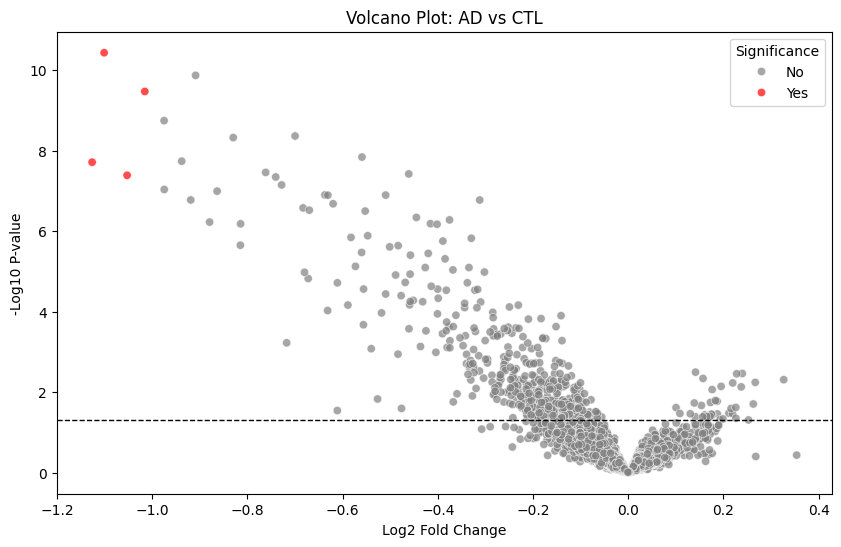

In [24]:
# 5️⃣ Проведение t-теста для каждого гена
dea_results = pd.DataFrame(index=gene_expression.columns)
p_values = []
logFC = []

for gene in gene_expression.columns:
    t_stat, p_val = ttest_ind(gene_expression.loc[group1, gene], gene_expression.loc[group2, gene], equal_var=False)
    p_values.append(p_val)
    
    # Вычисляем log2 Fold Change
    mean_group1 = gene_expression.loc[group1, gene].mean()
    mean_group2 = gene_expression.loc[group2, gene].mean()
    logFC.append(np.log2(mean_group1 / mean_group2) if mean_group2 != 0 else np.nan)

# Записываем результаты
dea_results["logFC"] = logFC
dea_results["p_value"] = p_values

# 6️⃣ FDR-коррекция p-значений (Benjamini-Hochberg)
dea_results["adj_p_value"] = multipletests(dea_results["p_value"], method="fdr_bh")[1]

# 7️⃣ Определение значимых генов
dea_results["Significant"] = "No"
dea_results.loc[(dea_results["adj_p_value"] < 0.05) & (abs(dea_results["logFC"]) > 1), "Significant"] = "Yes"

# 8️⃣ Визуализация: Вулкано-график
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dea_results["logFC"], 
    y=-np.log10(dea_results["p_value"]), 
    hue=dea_results["Significant"], 
    palette={"Yes": "red", "No": "gray"}, 
    alpha=0.7
)
plt.axhline(-np.log10(0.05), color="black", linestyle="--", linewidth=1)  # Линия порога значимости
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.title(f"Volcano Plot: {group1_name} vs {group2_name}")
plt.legend(title="Significance")
plt.show()



In [26]:
dea_results.query('Significant == "Yes"')

,logFC,p_value,adj_p_value,Significant
ILMN_1656625,-1.101083,3.728312e-11,6.104738e-07,Yes
ILMN_1711729,-1.126328,1.948923e-08,3.545740e-05,Yes
ILMN_1719032,-1.015655,3.416080e-10,1.864496e-06,Yes
ILMN_1731546,-1.052837,4.117861e-08,5.618822e-05,Yes
